<a href="https://colab.research.google.com/github/Ramanarayanan/DeepLearningAndGenerativeAi/blob/main/Gen_AI_WEEK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sure, I'll explain each topic with examples:

### 1. Tokenization
**Definition:** Tokenization is the process of breaking down text into smaller units, usually words or subwords. This is a crucial step in natural language processing (NLP) as it converts raw text into manageable pieces for further analysis.

**Example:**
Consider the sentence: "ChatGPT is amazing."

- **Tokenization Result:** ["ChatGPT", "is", "amazing", "."]
  
In this example, the sentence is split into individual tokens (words and punctuation marks).

### 2. Numericalization
**Definition:** Numericalization is the process of converting tokens (words or subwords) into numerical values so that they can be processed by machine learning algorithms. This often involves mapping each token to a unique integer.

**Example:**
Using the tokens from the previous example: ["ChatGPT", "is", "amazing", "."]

- **Numericalization Mapping:**
  - "ChatGPT" → 1
  - "is" → 2
  - "amazing" → 3
  - "." → 4

- **Numericalized Result:** [1, 2, 3, 4]

### 3. Word Embedding
**Definition:** Word embeddings are dense vector representations of words in a continuous vector space. Unlike one-hot encoding, embeddings capture semantic meaning and relationships between words. Each word is mapped to a vector of real numbers.

**Example:**
Let's say we use a simple embedding space where:
- "ChatGPT" might be represented as [0.5, -0.2, 0.1, ...]
- "is" might be represented as [0.1, 0.3, -0.4, ...]

These vectors encode the meaning and context of the words.

### 4. Word2Vec
**Definition:** Word2Vec is a popular technique for learning word embeddings. Developed by Google, it includes two main models: Continuous Bag of Words (CBOW) and Skip-gram. Both models use neural networks to predict words based on their context.

**Example:**
Suppose we use Word2Vec with a Skip-gram model. Given the context words ["ChatGPT", "is"], the model tries to predict a target word like "amazing". After training, similar words like "wonderful" or "great" might have similar embeddings to "amazing".

### 5. Visualization of Words
**Definition:** Visualization of words often involves plotting the word embeddings in a 2D or 3D space to understand their relationships and clustering. This is typically done using dimensionality reduction techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding).

**Example:**
If we visualize word embeddings using t-SNE, words like "king", "queen", "man", and "woman" might cluster in a way that reflects their semantic relationships. You might see "king" and "queen" close together, while "man" and "woman" are also close.
https://in.mathworks.com/help/textanalytics/ug/visualize-word-embedding-using-text-scatter-plot.html

### 6. Embedding Matrix
**Definition:** An embedding matrix is a large matrix where each row corresponds to the embedding vector of a specific word in the vocabulary. It is used to convert word indices into their corresponding embeddings during training and inference.

**Example:**
Suppose we have a vocabulary with 5 words, and each word is represented by a 3-dimensional embedding. The embedding matrix might look like this:

```
[
  [0.2, 0.1, -0.4],  // Embedding for "ChatGPT"
  [0.3, -0.2, 0.1],  // Embedding for "is"
  [-0.1, 0.4, -0.3], // Embedding for "amazing"
  [0.0, 0.2, 0.5],   // Embedding for "hello"
  [-0.3, -0.1, 0.2]  // Embedding for "world"
]
```

Here, each row corresponds to a specific word, and the entire matrix is used to map word indices to their corresponding embeddings during NLP tasks.

I hope this helps clarify these concepts! If you have any more questions or need further examples, feel free to ask.

Word Embeddings are numeric representations of words in a lower-dimensional space, capturing semantic and syntactic information. They play a vital role in Natural Language Processing (NLP) tasks. This article explores traditional and neural approaches, such as TF-IDF, Word2Vec, and GloVe, offering insights into their advantages and disadvantages. Understanding the importance of pre-trained word embeddings, providing a comprehensive understanding of their applications in various NLP scenarios.

What is Word Embedding in NLP?
Word Embedding is an approach for representing words and documents. Word Embedding or Word Vector is a numeric vector input that represents a word in a lower-dimensional space. It allows words with similar meanings to have a similar representation.

Word Embeddings are a method of extracting features out of text so that we can input those features into a machine learning model to work with text data. They try to preserve syntactical and semantic information. The methods such as Bag of Words (BOW), CountVectorizer and TFIDF rely on the word count in a sentence but do not save any syntactical or semantic information. In these algorithms, the size of the vector is the number of elements in the vocabulary. We can get a sparse matrix if most of the elements are zero. Large input vectors will mean a huge number of weights which will result in high computation required for training. Word Embeddings give a solution to these problems.

Need for Word Embedding?
To reduce dimensionality
To use a word to predict the words around it.
Inter-word semantics must be captured.
How are Word Embeddings used?
They are used as input to machine learning models.
Take the words —-> Give their numeric representation —-> Use in training or inference.
To represent or visualize any underlying patterns of usage in the corpus that was used to train them.
Let’s take an example to understand how word vector is generated by taking emotions which are most frequently used in certain conditions and transform each emoji into a vector and the conditions will be our features.

emoji

In a similar way, we can create word vectors for different words as well on the basis of given features. The words with similar vectors are most likely to have the same meaning or are used to convey the same sentiment.

. One-Hot Encoding
One-hot encoding is a simple method for representing words in natural language processing (NLP). In this encoding scheme, each word in the vocabulary is represented as a unique vector, where the dimensionality of the vector is equal to the size of the vocabulary. The vector has all elements set to 0, except for the element corresponding to the index of the word in the vocabulary, which is set to 1.

In [ ]:
def one_hot_encode(text):
	words = text.split()
	vocabulary = set(words)
	word_to_index = {word: i for i, word in enumerate(vocabulary)}
	one_hot_encoded = []
	for word in words:
		one_hot_vector = [0] * len(vocabulary)
		one_hot_vector[word_to_index[word]] = 1
		one_hot_encoded.append(one_hot_vector)

	return one_hot_encoded, word_to_index, vocabulary

# sample
example_text = "cat in the hat dog on the mat bird in the tree"

one_hot_encoded, word_to_index, vocabulary = one_hot_encode(example_text)

print("Vocabulary:", vocabulary)
print("Word to Index Mapping:", word_to_index)
print("One-Hot Encoded Matrix:")
for word, encoding in zip(example_text.split(), one_hot_encoded):
	print(f"{word}: {encoding}")


Vocabulary: {'bird', 'the', 'on', 'tree', 'hat', 'cat', 'in', 'dog', 'mat'}
Word to Index Mapping: {'bird': 0, 'the': 1, 'on': 2, 'tree': 3, 'hat': 4, 'cat': 5, 'in': 6, 'dog': 7, 'mat': 8}
One-Hot Encoded Matrix:
cat: [0, 0, 0, 0, 0, 1, 0, 0, 0]
in: [0, 0, 0, 0, 0, 0, 1, 0, 0]
the: [0, 1, 0, 0, 0, 0, 0, 0, 0]
hat: [0, 0, 0, 0, 1, 0, 0, 0, 0]
dog: [0, 0, 0, 0, 0, 0, 0, 1, 0]
on: [0, 0, 1, 0, 0, 0, 0, 0, 0]
the: [0, 1, 0, 0, 0, 0, 0, 0, 0]
mat: [0, 0, 0, 0, 0, 0, 0, 0, 1]
bird: [1, 0, 0, 0, 0, 0, 0, 0, 0]
in: [0, 0, 0, 0, 0, 0, 1, 0, 0]
the: [0, 1, 0, 0, 0, 0, 0, 0, 0]
tree: [0, 0, 0, 1, 0, 0, 0, 0, 0]


. Bag of Word (Bow)
Bag-of-Words (BoW) is a text representation technique that represents a document as an unordered set of words and their respective frequencies. It discards the word order and captures the frequency of each word in the document, creating a vector representation.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
documents = ["This is the first document.",
			"This document is the second document.",
			"And this is the third one.",
			"Is this the first document?"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

print("Bag-of-Words Matrix:")
print(X.toarray())
print("Vocabulary (Feature Names):", feature_names)


Bag-of-Words Matrix:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Vocabulary (Feature Names): ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


While BoW is a simple and interpretable representation, below disadvantages highlight its limitations in capturing certain aspects of language structure and semantics:

BoW ignores the order of words in the document, leading to a loss of sequential information and context making it less effective for tasks where word order is crucial, such as in natural language understanding.
BoW representations are often sparse, with many elements being zero resulting in increased memory requirements and computational inefficiency, especially when dealing with large datasets.


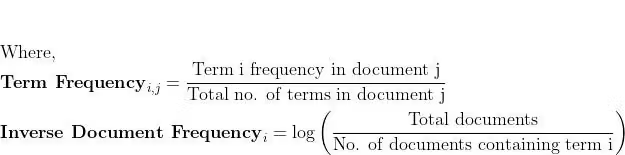


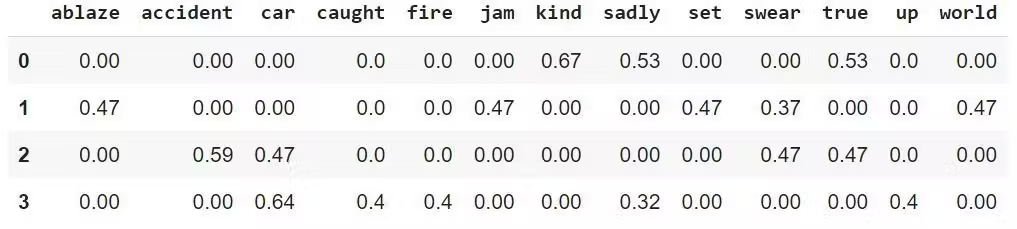

1.3. Term frequency-inverse document frequency (TF-IDF)
Term Frequency-Inverse Document Frequency, commonly known as TF-IDF, is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It is widely used in natural language processing and information retrieval to evaluate the significance of a term within a specific document in a larger corpus. TF-IDF consists of two components:

Term Frequency (TF): Term Frequency measures how often a term (word) appears in a document. It is calculated using the formula:
\text{TF}(t,d) = \frac{\text{Total number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}  
image.png        

Inverse Document Frequency (IDF): Inverse Document Frequency measures the importance of a term across a collection of documents. It is calculated using the formula:
\text{IDF}(t,D) = \log\left(\frac{\text{Total documents }}{\text{Number of documents containing term t}}\right)          
image.png
The TF-IDF score for a term t in a document d is then given by multiplying the TF and IDF values:

TF-IDF(t,d,D)=TF(t,d)×IDF(t,D)          
image.png
The higher the TF-IDF score for a term in a document, the more important that term is to that document within the context of the entire corpus. This weighting scheme helps in identifying and extracting relevant information from a large collection of documents, and it is commonly used in text mining, information retrieval, and document clustering.

Let’s Implement Term Frequency-Inverse Document Frequency (TF-IDF) using python with the scikit-learn library. It begins by defining a set of sample documents. The TfidfVectorizer is employed to transform these documents into a TF-IDF matrix. The code then extracts and prints the TF-IDF values for each word in each document. This statistical measure helps assess the importance of words in a document relative to their frequency across a collection of documents, aiding in information retrieval and text analysis tasks.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample
documents = [
	"The quick brown fox jumps over the lazy dog.",
	"A journey of a thousand miles begins with a single step.",
]

vectorizer = TfidfVectorizer() # Create the TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
tfidf_values = {}

for doc_index, doc in enumerate(documents):
	feature_index = tfidf_matrix[doc_index, :].nonzero()[1]
	tfidf_doc_values = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
	tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}
#let's print
for doc_index, values in tfidf_values.items():
	print(f"Document {doc_index + 1}:")
	for word, tfidf_value in values.items():
		print(f"{word}: {tfidf_value}")
	print("\n")


Document 1:
dog: 0.30151134457776363
lazy: 0.30151134457776363
over: 0.30151134457776363
jumps: 0.30151134457776363
fox: 0.30151134457776363
brown: 0.30151134457776363
quick: 0.30151134457776363
the: 0.6030226891555273


Document 2:
step: 0.3535533905932738
single: 0.3535533905932738
with: 0.3535533905932738
begins: 0.3535533905932738
miles: 0.3535533905932738
thousand: 0.3535533905932738
of: 0.3535533905932738
journey: 0.3535533905932738




2. Neural Approach
2.1. Word2Vec
Word2Vec is a neural approach for generating word embeddings. It belongs to the family of neural word embedding techniques and specifically falls under the category of distributed representation models. It is a popular technique in natural language processing (NLP) that is used to represent words as continuous vector spaces. Developed by a team at Google, Word2Vec aims to capture the semantic relationships between words by mapping them to high-dimensional vectors. The underlying idea is that words with similar meanings should have similar vector representations. In Word2Vec every word is assigned a vector. We start with either a random vector or one-hot vector.

There are two neural embedding methods for Word2Vec, Continuous Bag of Words (CBOW) and Skip-gram.

2.2. Continuous Bag of Words(CBOW)

Continuous Bag of Words (CBOW) is a type of neural network architecture used in the Word2Vec model. The primary objective of CBOW is to predict a target word based on its context, which consists of the surrounding words in a given window. Given a sequence of words in a context window, the model is trained to predict the target word at the center of the window.

CBOW is a feedforward neural network with a single hidden layer. The input layer represents the context words, and the output layer represents the target word. The hidden layer contains the learned continuous vector representations (word embeddings) of the input words.

The architecture is useful for learning distributed representations of words in a continuous vector space.

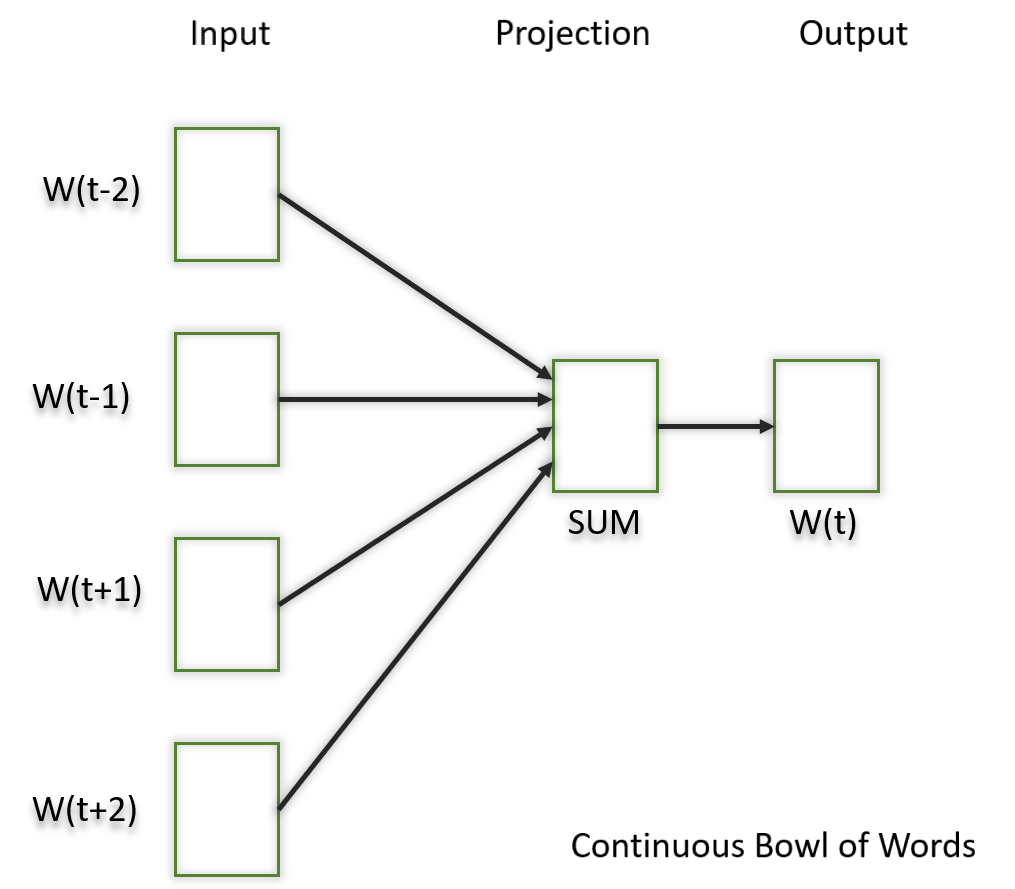

The hidden layer contains the continuous vector representations (word embeddings) of the input words.

The weights between the input layer and the hidden layer are learned during training.
The dimensionality of the hidden layer represents the size of the word embeddings (the continuous vector space).


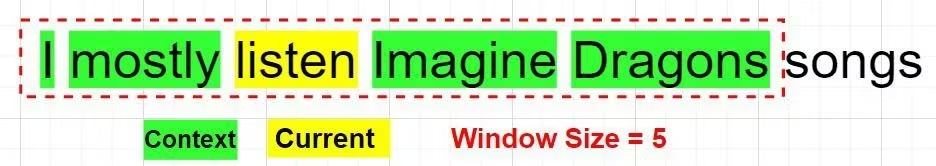



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define CBOW model
class CBOWModel(nn.Module):
	def __init__(self, vocab_size, embed_size):
		super(CBOWModel, self).__init__()
		self.embeddings = nn.Embedding(vocab_size, embed_size)
		self.linear = nn.Linear(embed_size, vocab_size)

	def forward(self, context):
		context_embeds = self.embeddings(context).sum(dim=1)
		output = self.linear(context_embeds)
		return output

# Sample data
context_size = 2
raw_text = "word embeddings are awesome"
tokens = raw_text.split()
vocab = set(tokens)
word_to_index = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(tokens) - 2):
	context = [word_to_index[word] for word in tokens[i - 2:i] + tokens[i + 1:i + 3]]
	target = word_to_index[tokens[i]]
	data.append((torch.tensor(context), torch.tensor(target)))

# Hyperparameters
vocab_size = len(vocab)
embed_size = 10
learning_rate = 0.01
epochs = 100

# Initialize CBOW model
cbow_model = CBOWModel(vocab_size, embed_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cbow_model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
	total_loss = 0
	for context, target in data:
		optimizer.zero_grad()
		output = cbow_model(context)
		loss = criterion(output.unsqueeze(0), target.unsqueeze(0))
		loss.backward()
		optimizer.step()
		total_loss += loss.item()
	print(f"Epoch {epoch + 1}, Loss: {total_loss}")

# Example usage: Get embedding for a specific word
word_to_lookup = "embeddings"
word_index = word_to_index[word_to_lookup]
embedding = cbow_model.embeddings(torch.tensor([word_index]))
print(f"Embedding for '{word_to_lookup}': {embedding.detach().numpy()}")


Epoch 1, Loss: 0
Epoch 2, Loss: 0
Epoch 3, Loss: 0
Epoch 4, Loss: 0
Epoch 5, Loss: 0
Epoch 6, Loss: 0
Epoch 7, Loss: 0
Epoch 8, Loss: 0
Epoch 9, Loss: 0
Epoch 10, Loss: 0
Epoch 11, Loss: 0
Epoch 12, Loss: 0
Epoch 13, Loss: 0
Epoch 14, Loss: 0
Epoch 15, Loss: 0
Epoch 16, Loss: 0
Epoch 17, Loss: 0
Epoch 18, Loss: 0
Epoch 19, Loss: 0
Epoch 20, Loss: 0
Epoch 21, Loss: 0
Epoch 22, Loss: 0
Epoch 23, Loss: 0
Epoch 24, Loss: 0
Epoch 25, Loss: 0
Epoch 26, Loss: 0
Epoch 27, Loss: 0
Epoch 28, Loss: 0
Epoch 29, Loss: 0
Epoch 30, Loss: 0
Epoch 31, Loss: 0
Epoch 32, Loss: 0
Epoch 33, Loss: 0
Epoch 34, Loss: 0
Epoch 35, Loss: 0
Epoch 36, Loss: 0
Epoch 37, Loss: 0
Epoch 38, Loss: 0
Epoch 39, Loss: 0
Epoch 40, Loss: 0
Epoch 41, Loss: 0
Epoch 42, Loss: 0
Epoch 43, Loss: 0
Epoch 44, Loss: 0
Epoch 45, Loss: 0
Epoch 46, Loss: 0
Epoch 47, Loss: 0
Epoch 48, Loss: 0
Epoch 49, Loss: 0
Epoch 50, Loss: 0
Epoch 51, Loss: 0
Epoch 52, Loss: 0
Epoch 53, Loss: 0
Epoch 54, Loss: 0
Epoch 55, Loss: 0
Epoch 56, Loss: 0
E

2.3. Skip-Gram
The Skip-Gram model learns distributed representations of words in a continuous vector space. The main objective of Skip-Gram is to predict context words (words surrounding a target word) given a target word. This is the opposite of the Continuous Bag of Words (CBOW) model, where the objective is to predict the target word based on its context. It is shown that this method produces more meaningful embeddings

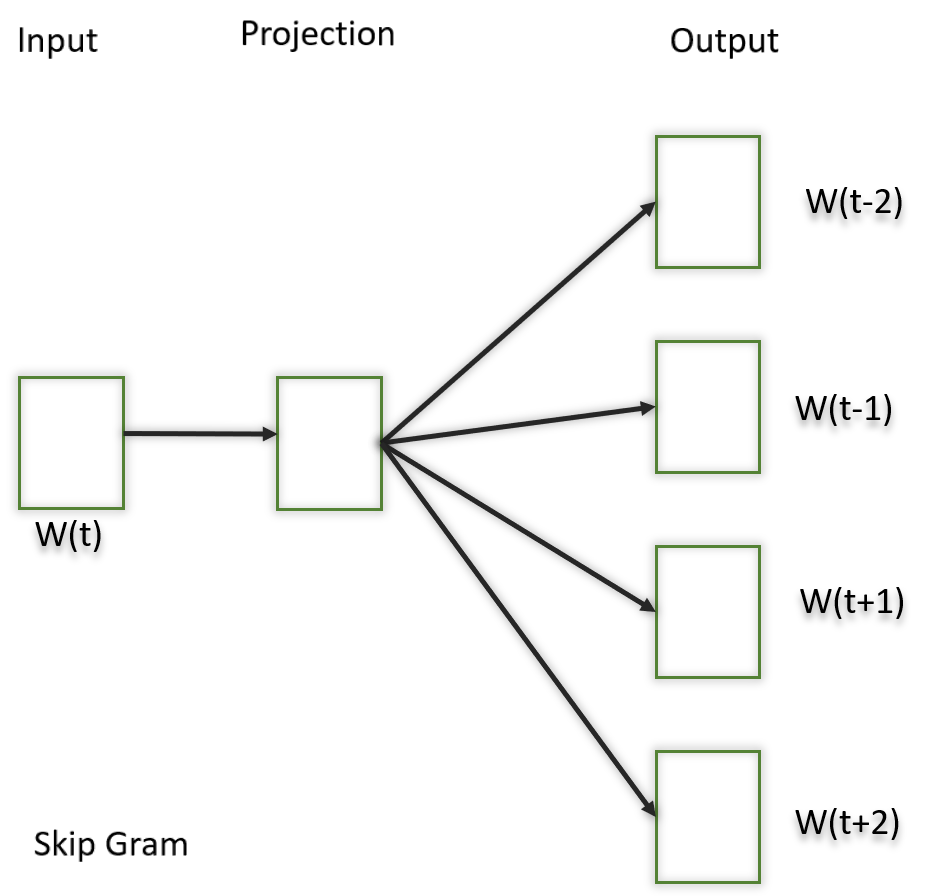


After applying the above neural embedding methods we get trained vectors of each word after many iterations through the corpus. These trained vectors preserve syntactical or semantic information and are converted to lower dimensions. The vectors with similar meaning or semantic information are placed close to each other in space.

Let’s understand with a basic example. The python code contains, vector_size parameter that controls the dimensionality of the word vectors, and you can adjust other parameters such as window based on your specific needs.



In [ ]:
!pip install gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt') # Download the tokenizer models if not already downloaded

sample = "Word embeddings are dense vector representations of words."
tokenized_corpus = word_tokenize(sample.lower()) # Lowercasing for consistency

skipgram_model = Word2Vec(sentences=[tokenized_corpus],
						vector_size=100, # Dimensionality of the word vectors
						window=5,		 # Maximum distance between the current and predicted word within a sentence
						sg=1,			 # Skip-Gram model (1 for Skip-Gram, 0 for CBOW)
						min_count=1,	 # Ignores all words with a total frequency lower than this
						workers=4)	 # Number of CPU cores to use for training the model

# Training
skipgram_model.train([tokenized_corpus], total_examples=1, epochs=10)
skipgram_model.save("skipgram_model.model")
loaded_model = Word2Vec.load("skipgram_model.model")
vector_representation = loaded_model.wv['word']
print("Vector representation of 'word':", vector_representation)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Vector representation of 'word': [-9.5800208e-03  8.9437785e-03  4.1664648e-03  9.2367809e-03
  6.6457358e-03  2.9233587e-03  9.8055992e-03 -4.4231843e-03
 -6.8048164e-03  4.2256550e-03  3.7299085e-03 -5.6668529e-03
  9.7035142e-03 -3.5551414e-03  9.5499391e-03  8.3657773e-04
 -6.3355025e-03 -1.9741615e-03 -7.3781307e-03 -2.9811086e-03
  1.0425397e-03  9.4814906e-03  9.3598543e-03 -6.5986011e-03
  3.4773252e-03  2.2767992e-03 -2.4910474e-03 -9.2290826e-03
  1.0267317e-03 -8.1645092e-03  6.3240929e-03 -5.8001447e-03
  5.5353874e-03  9.8330071e-03 -1.5987856e-04  4.5296676e-03
 -1.8086446e-03  7.3613892e-03  3.9419360e-03 -9.0095028e-03
 -2.3953868e-03  3.6261671e-03 -1.0080514e-04 -1.2024897e-03
 -1.0558038e-03 -1.6681013e-03  6.0541567e-04  4.1633579e-03
 -4.2531900e-03 -3.8336846e-03 -5.0755290e-05  2.6549282e-04
 -1.7014991e-04 -4.7843382e-03  4.3120929e-03 -2.1710952e-03
  2.1056964e-03  6.6702347e-04  5.9686624e-03 -6.8418151e-03
 -6.8183104e-03 -4.4762432e-03  9.4359247e-03 -1.593

In practice, the choice between CBOW and Skip-gram often depends on the specific characteristics of the data and the task at hand. CBOW might be preferred when training resources are limited, and capturing syntactic information is important. Skip-gram, on the other hand, might be chosen when semantic relationships and the representation of rare words are crucial.

3. Pretrained Word-Embedding
Pre-trained word embeddings are representations of words that are learned from large corpora and are made available for reuse in various natural language processing (NLP) tasks. These embeddings capture semantic relationships between words, allowing the model to understand similarities and relationships between different words in a meaningful way.

3.1. GloVe
GloVe is trained on global word co-occurrence statistics. It leverages the global context to create word embeddings that reflect the overall meaning of words based on their co-occurrence probabilities. this method, we take the corpus and iterate through it and get the co-occurrence of each word with other words in the corpus. We get a co-occurrence matrix through this. The words which occur next to each other get a value of 1, if they are one word apart then 1/2, if two words apart then 1/3 and so on.

Let us take an example to understand how the matrix is created. We have a small corpus:
Corpus:
It is a nice evening.
Good Evening!
Is it a nice evening?

The upper half of the matrix will be a reflection of the lower half. We can consider a window frame as well to calculate the co-occurrences by shifting the frame till the end of the corpus. This helps gather information about the context in which the word is used.

Initially, the vectors for each word is assigned randomly. Then we take two pairs of vectors and see how close they are to each other in space. If they occur together more often or have a higher value in the co-occurrence matrix and are far apart in space then they are brought close to each other. If they are close to each other but are rarely or not frequently used together then they are moved further apart in space.

After many iterations of the above process, we’ll get a vector space representation that approximates the information from the co-occurrence matrix. The performance of GloVe is better than Word2Vec in terms of both semantic and syntactic capturing.

In [ ]:
from gensim.models import KeyedVectors
from gensim.downloader import load

glove_model = load('glove-wiki-gigaword-50')
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# Compute similarity for each pair of words
for pair in word_pairs:
	similarity = glove_model.similarity(pair[0], pair[1])
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using GloVe: {similarity:.3f}")


[==================================================] 100.0% 66.0/66.0MB downloaded
Similarity between 'learn' and 'learning' using GloVe: 0.802
Similarity between 'india' and 'indian' using GloVe: 0.865
Similarity between 'fame' and 'famous' using GloVe: 0.589


3.3. BERT (Bidirectional Encoder Representations from Transformers)
BERT is a transformer-based model that learns contextualized embeddings for words. It considers the entire context of a word by considering both left and right contexts, resulting in embeddings that capture rich contextual information.

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# Compute similarity for each pair of words
for pair in word_pairs:
	tokens = tokenizer(pair, return_tensors='pt')
	with torch.no_grad():
		outputs = model(**tokens)

	# Extract embeddings for the [CLS] token
	cls_embedding = outputs.last_hidden_state[:, 0, :]

	similarity = torch.nn.functional.cosine_similarity(cls_embedding[0], cls_embedding[1], dim=0)

	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using BERT: {similarity:.3f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Similarity between 'learn' and 'learning' using BERT: 0.930
Similarity between 'india' and 'indian' using BERT: 0.957
Similarity between 'fame' and 'famous' using BERT: 0.956


Advantages and Disadvantage of Word Embeddings
Advantages
It is much faster to train than hand build models like WordNet (which uses graph embeddings).
Almost all modern NLP applications start with an embedding layer.
It Stores an approximation of meaning.
Disadvantages
It can be memory intensive.
It is corpus dependent. Any underlying bias will have an effect on your model.
It cannot distinguish between homophones. Eg: brake/break, cell/sell, weather/whether etc.
Conclusion
In conclusion, word embedding techniques such as TF-IDF, Word2Vec, and GloVe play a crucial role in natural language processing by representing words in a lower-dimensional space, capturing semantic and syntactic information.

Frequently Asked Questions (FAQs)
1. Does GPT use word embeddings?
GPT uses context-based embeddings rather than traditional word embeddings. It captures word meaning in the context of the entire sentence.

2. What is the difference between Bert and word embeddings?
BERT is contextually aware, considering the entire sentence, while traditional word embeddings, like Word2Vec, treat each word independently.

3. What are the two types of word embedding?
Word embeddings can be broadly evaluated in two categories, intrinsic and extrinsic. For intrinsic evaluation, word embeddings are used to calculate or predict semantic similarity between words, terms, or sentences.

4. How does word vectorization work?
Word vectorization converts words into numerical vectors, capturing semantic relationships. Techniques like TF-IDF, Word2Vec, and GloVe are common.

5. What are the benefits of word embeddings?
Word embeddings offer semantic understanding, capture context, and enhance NLP tasks. They reduce dimensionality, speed up training, and aid in language pattern recognition.

Visualize Word Embeddings Using Text Scatter Plots

Visualizing word embeddings using text scatter plots is a powerful way to understand the relationships and clusters among words in a given embedding space. Here’s how you can create such visualizations:

### Steps to Visualize Word Embeddings Using Text Scatter Plots

1. **Train or Obtain Word Embeddings:**
   You first need word embeddings, which are typically vectors representing words. You can train these embeddings using models like Word2Vec, GloVe, or use pre-trained embeddings from libraries such as `gensim` or `spacy`.

2. **Dimensionality Reduction:**
   Since word embeddings are often high-dimensional (e.g., 50, 100, 300 dimensions), you need to reduce the dimensionality for visualization. Common techniques include:
   - **PCA (Principal Component Analysis):** Reduces the dimensions to 2 or 3 while retaining most of the variance.
   - **t-SNE (t-Distributed Stochastic Neighbor Embedding):** A non-linear technique that tends to preserve local structures, making it suitable for visualization.

3. **Create the Scatter Plot:**
   Plot the reduced-dimension embeddings on a 2D or 3D scatter plot. You can use libraries like `matplotlib` or `plotly` for plotting.

### Example with Python Code

Here’s a step-by-step example using Python:

1. **Install Necessary Libraries:**
   You may need `gensim`, `sklearn`, and `matplotlib` if you don’t have them already.
   ```bash
   pip install gensim scikit-learn matplotlib
   ```

2. **Load Pre-trained Word Embeddings:**
   For simplicity, let's use pre-trained embeddings from `gensim`.

   ```python
   from gensim.models import KeyedVectors

   # Load pre-trained Word2Vec model (e.g., Google's pre-trained model)
   model = KeyedVectors.load_word2vec_format('path/to/GoogleNews-vectors-negative300.bin', binary=True)
   ```

3. **Select Words and Reduce Dimensions:**

   ```python
   import numpy as np
   from sklearn.decomposition import PCA
   from sklearn.manifold import TSNE
   import matplotlib.pyplot as plt

   # Select words to visualize
   words = ["king", "queen", "man", "woman", "paris", "london", "berlin", "dog", "cat"]
   embeddings = np.array([model[word] for word in words])

   # Reduce dimensions using PCA and/or t-SNE
   pca = PCA(n_components=50)
   pca_result = pca.fit_transform(embeddings)

   tsne = TSNE(n_components=2, random_state=0)
   tsne_result = tsne.fit_transform(pca_result)
   ```

4. **Plot the Words:**

   ```python
   plt.figure(figsize=(10, 6))
   plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

   for i, word in enumerate(words):
       plt.text(tsne_result[i, 0], tsne_result[i, 1], word, fontsize=9)

   plt.xlabel('Dimension 1')
   plt.ylabel('Dimension 2')
   plt.title('Word Embeddings Visualization')
   plt.grid(True)
   plt.show()
   ```

### Explanation

- **Loading Embeddings:** The `KeyedVectors` class from `gensim` loads pre-trained embeddings.
- **Selecting Words:** We choose a subset of words to visualize. Each word’s embedding is retrieved from the model.
- **Dimensionality Reduction:** PCA reduces the dimensions first, making it easier for t-SNE to work effectively. t-SNE then maps the embeddings to a 2D space.
- **Plotting:** We use `matplotlib` to create a scatter plot where each word is plotted based on its t-SNE coordinates.

### Interpreting the Scatter Plot

In the scatter plot:
- **Clusters:** Words with similar meanings or contexts tend to cluster together.
- **Proximity:** The distance between words reflects their semantic similarity. Words closer together in the plot have more similar embeddings.

This visualization helps to intuitively understand how different words are related based on their embeddings and can reveal interesting patterns and relationships in your data.


In [ ]:
from gensim.models import KeyedVectors

# Load pre-trained Word2Vec model (e.g., Google's pre-trained model)
model = KeyedVectors.load_word2vec_format('path/to/GoogleNews-vectors-negative300.bin', binary=True)


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/GoogleNews-vectors-negative300.bin'

https://in.mathworks.com/help/textanalytics/ug/visualize-word-embedding-using-text-scatter-plot.html
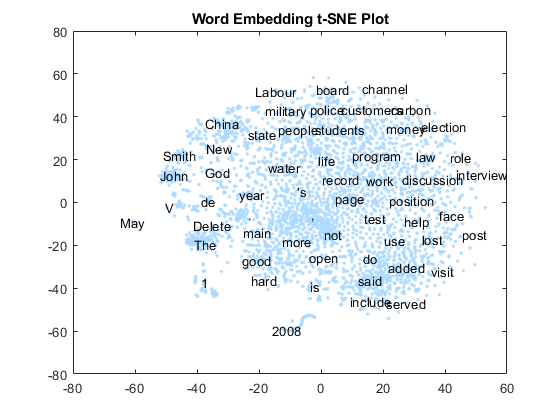

In [ ]:
from gensim.models import KeyedVectors

# Load pre-trained Word2Vec model (e.g., Google's pre-trained model)
model = KeyedVectors.load_word2vec_format('path/to/GoogleNews-vectors-negative300.bin', binary=True)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select words to visualize
words = ["king", "queen", "man", "woman", "paris", "london", "berlin", "dog", "cat"]
embeddings = np.array([model[word] for word in words])

# Reduce dimensions using PCA and/or t-SNE
pca = PCA(n_components=50)
pca_result = pca.fit_transform(embeddings)

tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(pca_result)


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

for i, word in enumerate(words):
    plt.text(tsne_result[i, 0], tsne_result[i, 1], word, fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings Visualization')
plt.grid(True)
plt.show()


Here’s a final checklist for a recap.

Bag of words: Extracts features from the text


TF-IDF: Information retrieval, keyword extraction

Word2Vec: Semantic analysis task

GloVe: Word analogy, named entity recognition tasks

BERT: language translation, question answering system

An **embedding matrix** is a key component in many natural language processing (NLP) and machine learning tasks. It is used to represent words or tokens as vectors in a dense, continuous vector space, which helps capture semantic relationships and meanings.

### Definition

An embedding matrix is a matrix where each row corresponds to the embedding vector of a specific word or token in the vocabulary. Each embedding vector represents a word or token in a multi-dimensional space, where similar words are positioned closer together.

### Components of an Embedding Matrix

1. **Vocabulary:** The set of all unique words or tokens that the model will use. For example, in a dataset containing the words ["cat", "dog", "fish"], the vocabulary consists of these three words.

2. **Embedding Dimensions:** The number of dimensions used to represent each word in the embedding space. Common dimensions are 50, 100, 300, etc. Higher dimensions capture more nuances but require more computational resources.

3. **Matrix Dimensions:** The embedding matrix is typically of size \( V \times D \), where \( V \) is the number of unique words (vocabulary size) and \( D \) is the number of dimensions of each embedding vector.

### How It Works

1. **Initialization:**
   - The embedding matrix is initialized with random values or pre-trained embeddings. For example, if you initialize the matrix randomly, each entry in the matrix starts with a random number.
   
2. **Training:**
   - During training, the embedding matrix is adjusted through backpropagation to better capture the relationships between words based on the task (e.g., sentiment analysis, translation). The goal is to fine-tune the embedding vectors so that they accurately reflect the semantic meanings and relationships of the words.

3. **Usage:**
   - For each word or token in the input data, its corresponding row in the embedding matrix is retrieved. These vectors are then used as input features for further processing, such as feeding into a neural network.

### Example

Suppose we have a vocabulary with four words and want to represent each word with a 3-dimensional embedding. The embedding matrix might look like this:

```
[
  [0.2, -0.1, 0.4],  # Embedding for "cat"
  [-0.3, 0.2, 0.1],  # Embedding for "dog"
  [0.5, -0.2, -0.1], # Embedding for "fish"
  [-0.1, 0.3, 0.2]   # Embedding for "bird"
]
```

### Practical Example

Consider the following Python code using `gensim` to load pre-trained word embeddings and create an embedding matrix:

```python
from gensim.models import KeyedVectors

# Load pre-trained embeddings (e.g., Google's Word2Vec model)
model = KeyedVectors.load_word2vec_format('path/to/GoogleNews-vectors-negative300.bin', binary=True)

# Define vocabulary (for demonstration purposes)
vocabulary = ["king", "queen", "man", "woman"]

# Initialize an embedding matrix with dimensions (vocab_size x embedding_dim)
embedding_dim = 300
embedding_matrix = np.zeros((len(vocabulary), embedding_dim))

# Fill the embedding matrix
for i, word in enumerate(vocabulary):
    if word in model:
        embedding_matrix[i] = model[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,)) # Random initialization for out-of-vocabulary words

print(embedding_matrix)
```

### Summary

1. **Embedding Matrix Structure:** A matrix where each row is an embedding vector for a word in the vocabulary.
2. **Purpose:** To provide a dense, meaningful representation of words or tokens that can capture semantic relationships.
3. **Usage:** The matrix is used in various NLP models to transform words into numerical vectors that models can understand and process.

Embedding matrices are fundamental in many NLP applications because they transform categorical data (words) into a form that can be effectively used by machine learning algorithms.

Certainly! If you want to create and use an embedding matrix without relying on a pre-trained file like `GoogleNews-vectors-negative300.bin`, you can start with randomly initialized embeddings or use embeddings from simpler models provided by libraries like `spaCy` or `scikit-learn`.

Here’s how you can create an embedding matrix from scratch using `gensim`’s `Word2Vec` model or use embeddings from `spaCy`.

### Example 1: Using `gensim` to Train a Simple Word2Vec Model

This example demonstrates how to train a Word2Vec model on a small corpus and create an embedding matrix from it.

```python
from gensim.models import Word2Vec
import numpy as np

# Sample corpus
sentences = [
    ["cat", "sat", "on", "the", "mat"],
    ["dog", "barked", "at", "the", "cat"],
    ["the", "cat", "and", "dog", "are", "friends"]
]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0)

# Define vocabulary
vocabulary = ["cat", "dog", "mat", "barked", "the", "and", "are", "friends"]

# Initialize an embedding matrix
embedding_dim = 50
embedding_matrix = np.zeros((len(vocabulary), embedding_dim))

# Fill the embedding matrix
word_index = {word: i for i, word in enumerate(vocabulary)}
for word, i in word_index.items():
    if word in model.wv:
        embedding_matrix[i] = model.wv[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

print("Embedding Matrix:\n", embedding_matrix)
```

### Example 2: Using `spaCy` for Pre-trained Embeddings

`spaCy` provides pre-trained word embeddings with its models. You can use these embeddings to create an embedding matrix.

```python
import spacy
import numpy as np

# Load spaCy model (e.g., the large English model)
nlp = spacy.load('en_core_web_lg')

# Define vocabulary
vocabulary = ["cat", "dog", "mat", "barked", "the", "and", "are", "friends"]

# Initialize an embedding matrix
embedding_dim = nlp.vocab.vectors.shape[1]
embedding_matrix = np.zeros((len(vocabulary), embedding_dim))

# Fill the embedding matrix
word_index = {word: i for i, word in enumerate(vocabulary)}
for word, i in word_index.items():
    if word in nlp.vocab:
        embedding_matrix[i] = nlp.vocab[word].vector
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

print("Embedding Matrix:\n", embedding_matrix)
```

### Explanation of the Code

1. **Training with `gensim`:**
   - **Train a Model:** We train a Word2Vec model on a small corpus.
   - **Create Vocabulary:** We define our vocabulary and initialize the embedding matrix.
   - **Populate Matrix:** We fill the matrix with the trained word vectors. For out-of-vocabulary words (if any), we initialize with random vectors.

2. **Using `spaCy`:**
   - **Load Model:** We load a pre-trained `spaCy` model which has embeddings.
   - **Create Vocabulary:** We define our vocabulary and initialize the embedding matrix.
   - **Populate Matrix:** We retrieve vectors from `spaCy`’s vocabulary. If a word is not found in `spaCy`’s vocabulary, we initialize it with random values.

These examples show how to create an embedding matrix either by training a model from scratch or by using pre-trained embeddings from a library. You can adapt these methods to fit your specific needs and data.